<a href="https://colab.research.google.com/github/MFairuziIszamAziz/APMProjectKel8A/blob/main/P1/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Reading the dataset
dataset = pd.read_csv("car_price.csv")
dataset.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [9]:
#Setting the value for X and Y
x = dataset[['enginesize', 'horsepower']]
y = dataset['price']

In [22]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [23]:
!pip install LinearRegression

In [24]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [25]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -8008.171836957321
Coefficients:


[('enginesize', 117.31356499854901), ('horsepower', 61.96030189237445)]

In [26]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 7825.77866537 10045.63240874 11508.74845183 10428.11134485
  9184.79522103 11508.74845183 17280.16051942 19258.78009401
 16307.00367235 23139.23173056 15596.51524357 16100.41783065
 11955.68464264 11154.31080401 39525.10173079  7493.65908673
  7825.77866537 13002.40273603 15850.96348992 19276.98807721
 15596.51524357 15596.51524357 27576.44226448  6763.34954159
 16307.00367235 22643.54931542 19276.98807721 21081.32769054
 10919.68367402 11528.56956818  6997.97667159 27787.13819215
 15709.7187226  18446.68913062 12079.60524643  9419.42235103
 13002.40273603 16307.00367235  7646.50479848 12004.43086696
 39055.8474708 ]


In [27]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
160,7738.0,7825.778665
186,8495.0,10045.632409
59,8845.0,11508.748452
165,9298.0,10428.111345
140,7603.0,9184.795221


In [28]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 79.30
Mean Absolute Error: 2799.2934914832836
Mean Square Error: 13332641.98440819
Root Mean Square Error: 3651.389048623577


Text(0.5, 1.0, 'Actual vs Predicted')

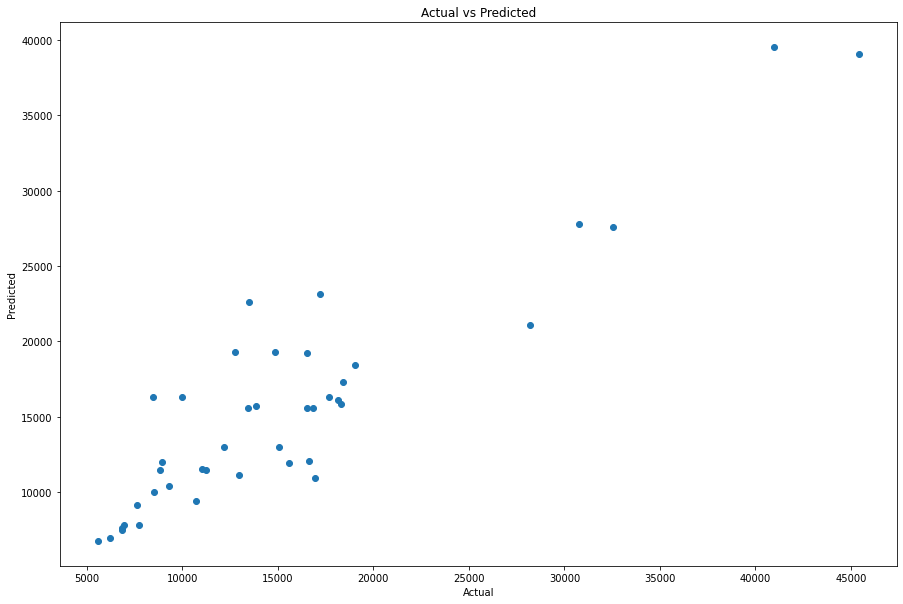

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')